In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/random-linear-regression/train.csv
/kaggle/input/random-linear-regression/test.csv


In [3]:
train=pd.read_csv('../input/random-linear-regression/train.csv')

In [4]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [5]:
test=pd.read_csv('../input/random-linear-regression/test.csv')

In [6]:
test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [9]:
print(train.shape)
print(test.shape)

(700, 2)
(300, 2)


In [12]:
data=pd.concat([train,test],axis=0)

In [13]:
data.shape

(1000, 2)

In [14]:
data.tail()

,x,y
295,71.0,68.545888
296,46.0,47.334876
297,55.0,54.090637
298,62.0,63.297171
299,47.0,52.459467


In [41]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [43]:
data.dropna(inplace=True)

In [44]:
data.isnull().sum()

x    0
y    0
dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)

In [46]:
x_train,x_test,y_train,y_test=train_test_split(data['x'],data['y'],test_size=0.1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(899,)
(100,)
(899,)
(100,)


In [47]:
x_train=np.array(x_train).reshape(-1,1)
x_test=np.array(x_test).reshape(-1,1)
y_train=np.array(y_train).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)

In [48]:
data.isnull().sum()

x    0
y    0
dtype: int64

In [49]:
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [50]:
y_train_pred=lr.predict(x_train)

In [52]:
from sklearn.metrics import r2_score
print("Training Score -" ,r2_score(y_train,y_train_pred))

Training Score - 0.9902118602672535


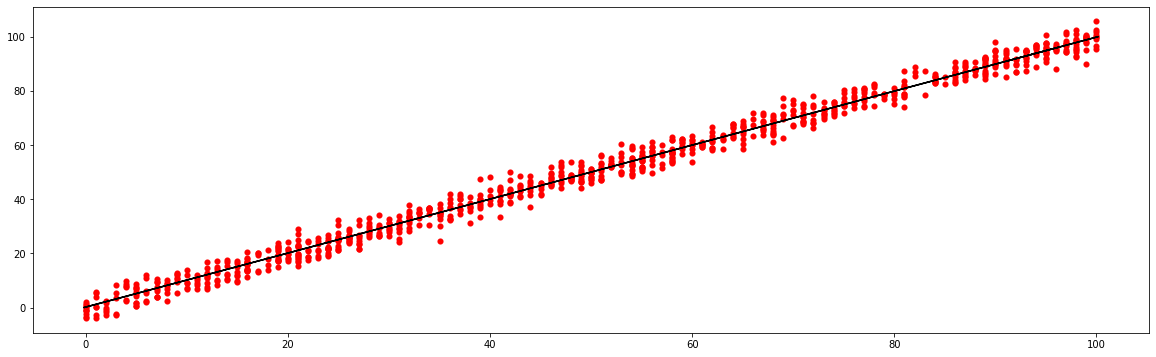

In [56]:
import matplotlib.pyplot as plt
#Train Data Visualization
%matplotlib inline
fig = plt.figure()
plt.plot(y_train_pred,x_train,color='black')
plt.scatter(x_train,y_train,color='red',linewidth=0.1)
fig.set_figheight(6)
fig.set_figwidth(20)
plt.show()